In [1]:
### reference 170901_observe_digital_wave
%pylab inline
%load_ext pyspecdata.ipy
from Instruments import *
from pyspecdata import *
import time
from serial.tools.list_ports import comports
import serial
from scipy import signal

print "These are the instruments available:"
SerialInstrument(None)
print "done printing available instruments"

with SerialInstrument('GDS-3254') as s:
    print s.respond('*idn?')
    
with SerialInstrument('AFG-2225') as s:
    print s.respond('*idn?')

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
These are the instruments available:

GW INSTEK,AFG-2225,SN:GEQ904866,V2.05

GW,GDS-3254,GEQ110185,V1.25

done printing available instruments
GW,GDS-3254,GEQ110185,V1.25

GW INSTEK,AFG-2225,SN:GEQ904866,V2.05



In [51]:
with AFG() as a:
    a.reset()
    x = r_[-6:6:200j]
    y = zeros_like(x)
    #create duplicate of x as an array container and fill each index with 0
    y[0::4]=0
    y[1::4]=1
    y[2::4]=0
    y[3::4]=-1
    y[-1]=0
    #in the new array container, now assign 3 and -3 to each alternating index
    a.digital_ndarray(y)
    print "CH1 burst set to",a.CH1.burst
    print "now, burst on"
    a.CH1.burst = True
    print "CH1 burst set to",a.CH1.burst
    print "now, output on"
    a.CH1.output = True
    #ch=1
    #print a.respond('SOUR%d:FUNC?'%ch)
    #print a.respond('SOUR%d:FREQ?'%ch)
    #print a.respond('SOUR%d:APPL?'%ch)
    #print a.demand('SOUR%d:FREQ MAX'%ch,'')

CH1 burst set to False
now, burst on
CH1 burst set to True
now, output on


In [ ]:
print x

In [ ]:
200./120e6

In [6]:
#rate = pts * freq
(80e6)/240

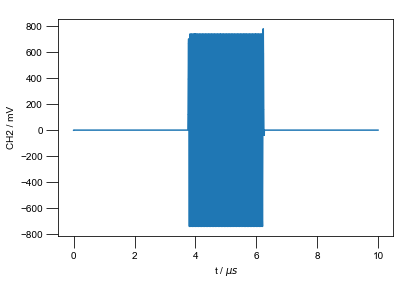

In [66]:
with GDS_scope() as g:
    data = g.waveform(ch=2)
data

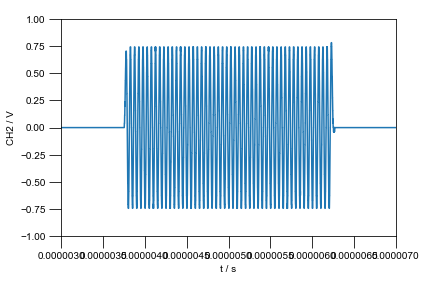

In [71]:
with GDS_scope() as g:
    data2 = g.waveform(ch=2)
data2
plot(data2)
ylim(-1,1)
xlim(0.000003,0.000007)


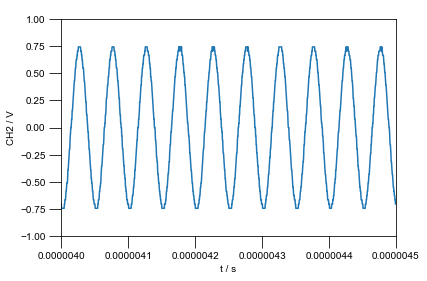

In [74]:
with GDS_scope() as g:
    data3 = g.waveform(ch=2)
data3
plot(data3)
ylim(-1,1)
xlim(0.000004,0.0000045)